In [1]:
!python --version

Python 2.7.10 :: Anaconda 2.4.0 (64-bit)



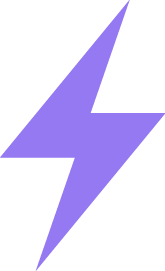

Connected to server at https://desolate-castle-4773.herokuapp.com


<IPython.core.display.Javascript object>

In [2]:
import logging, gensim, bz2
from gensim import corpora, models, similarities
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from bs4 import BeautifulSoup
import nltk
import re
from nltk.corpus import stopwords
import string
import itertools
import random
exclude = set(string.punctuation)
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18.0, 18.0)
import numpy as np
from lightning import Lightning
from numpy import random, asarray
import networkx as nx
from __future__ import division
import math
import random
import pickle
lgn = Lightning(ipython=True, host='https://desolate-castle-4773.herokuapp.com/')
lgn.set_size(size='large')

min_score = 0.05

In [3]:
topic_names = pickle.load( open( "topics_names.p", "rb" ) )

# Load text

In [4]:
def loadText(path):   
    if path[-4:] == 'liff':
        soup = BeautifulSoup( open(path), 'lxml')
        s = ' '
        for string in soup.find_all("source"):
            s += ' ' + string.string
        return s
    else:
        return open(path, 'r').read()


In [5]:
text = loadText(u"all_source_texts/Turkish_Basketball_Clubs_Evaluationprogramme15-16_Repucom_150612_Übersetzten-en-tr-T.mxliff")
print text

  {1>CONNECTED SOLUTIONS <1}{2>FOR RIGHTS HOLDERS<2} {1>UNDERSTANDING <1}{2>THE <2}{3>VALUE <3}{4>ACROSS <4}{5>MULTI-<5} {1} {2>RETAINING <2}{3>AND <3}{4>GROWING SPONSORS<4} {1>MEDIA CHANNELS<1} {2>UNDERSTANDING  THE MARKET<2} {b>FRAGMENTED  MEDIA MARKET<b} {1>DEMONSTRATING GLOBAL <1}{2>VALUE <2}{3>TANGIBLE  <3}{4>&  INTANGIBLE <4}{5>VALUATION<5} {1} INCREASING {1>RIGHTS HOLDER <1}{2>VALUE<2} {1} {2>SPONSOR <2}{3>IMPACT<3} {1>PARTNER  SATISFACTION  <1}{2>& SERVICING<2} {1>ATTRACTING  <1}{2>NEW<2} {b>SPONSORS<b} {1} {2>GROWING &  ENGAGING<2} {1>THE <1}{2>FAN <2}{3>BASE<3} {1>SALES <1}{2>STORY <2}{3>CATEGORY <3}{4>INTELLIGENCE BRAND AMPLIFICATION<4} {1} {2>FAN <2}{3>SEGMENTATION <3}{4>FAN <4}{5>EXPERIENCE <5}{6>DIGITAL  STRATEGY<6} © REPUCOM | JUNE 2015 {1>TRUSTED ADVISOR <1}{2>AND PARTNER<2} {b>WE ARE THE PROVIDER OF CHOICE FOR OVER 1,700 OF THE TOP RIGHTS<b} {1>HOLDERS, BRANDS, AGENCIES AND <1}{2>MEDIA COMPANIES    <2}{3>WORLDWIDE.<3} {b>BRANDS<b} {1} {2>RIGHTS HOLDERS<2} {1} {2>AGENCI

# tokenize

In [6]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from stemming.porter2 import stem
    
def raw_tokenize(text):
    text = text.lower()
    # tokenize + punctuation
    from nltk.tokenize import RegexpTokenizer
    tokenizer = RegexpTokenizer(r'\w+') # remove punctuation
    return tokenizer.tokenize(text)
def tokenize(text):
    text = raw_tokenize(text)
    # remove stopwords
    from nltk.corpus import stopwords
    stops = stopwords.words('english')
    text = [ w for w in text if w.lower() not in stops]
    # Exclude numbers
    text = [s for s in text if not re.search(r'\d',s)]
    #remove word with less than 3letters
    text = [s for s in text if len(s) > 2]
    # stemmer
    lmtzr = WordNetLemmatizer()
#     stemmer = SnowballStemmer("english")
    text =  [(lmtzr.lemmatize(t)) for t in text] 
    return text

def count_words(text):
    text = text.lower()
    # tokenize + punctuation
    from nltk.tokenize import RegexpTokenizer
    tokenizer = RegexpTokenizer(r'\w+') # remove punctuation
    text = tokenizer.tokenize(text)
    
    return len(text)

In [7]:
tokens =  tokenize(text)

# load all texts

In [8]:
import os
import sys
filelist = []
root = u"all_source_texts/"
for filename in os.listdir(root):
    filename = root + filename
    filelist .append(filename.encode(sys.getfilesystemencoding()))

In [9]:
i = 0
corpus_tokens = {}
for f in filelist:
    corpus_tokens[f] = tokenize(loadText( f ))
    i += 1


# simulate translators data

In [10]:
#number of translators
N_trans = 30
translators = {i:i for i in range(0,N_trans) }
len_tokens = [ len(t) for t in corpus_tokens.values()]      
# build translated_by dict
translated_by = dict()
for f in filelist:
    ts = []   
    n = 2 + int(4 * float(len(corpus_tokens[f])) / float(max(len_tokens)))
    for k in range(0,n):
        ts.append( random.choice(translators.keys()))
    
    translated_by[f] = ts
    
for t in translated_by:
    print t
    print translated_by[t]
    
    

    

all_source_texts/Text1_1070Woerter-en-de-T.mxliff
[24, 15]
all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOUT_STICKERS SECTION 6-en-fr_ca-CR.mxliff
[8, 1]
all_source_texts/262_GB_produktbrochure_Dies and rools_press (1)-en-ru-T.mxliff
[19, 1]
all_source_texts/Centax Telecom agreement 1 300915-en-de-T.mxliff
[24, 22]
all_source_texts/Vecka 32-6 (426-479)-en-nb_no-T.mxliff
[18, 13]
all_source_texts/YTP504 instruction-en-de-T.mxliff
[22, 8]
all_source_texts/TV-#124290-v1-Vehicle_Rental_Agreement__-_template clean_redl. UvH-en-de-T.mxliff
[8, 2]
all_source_texts/Vores ansvar_en-GB-en-it-T.mxliff
[3, 22]
all_source_texts/Vecka 32-4 (218-329)-en-nb_no-T.mxliff
[26, 1]
all_source_texts/ContentMatrix_Final Translation Template_SWEDISH-en-da-T.mxliff
[9, 21]
all_source_texts/joined-P4054-J2-4-6-8-10-12-14-16-18-20-22-24-en-sv-T.mxliff
[26, 25]
all_source_texts/Inspiration - tiny gardens_DA_en-GB-en-it-T.mxliff
[6, 23]
all_source_texts/Vertrag (5)-en-de-T.mxliff
[2, 14]
all_sourc

# Load LDA

In [11]:
lda = gensim.models.ldamodel.LdaModel.load(u'lda/wikipedia_lda', mmap='r')

# make dictionary

In [12]:
corpus = { f:lda.id2word.doc2bow(corpus_tokens[f]) for f in corpus_tokens}

# update lda 

In [13]:
lda.update( corpus.values())

In [14]:
# dictionary.save('dict_corpus')

In [15]:
for f in filelist:
    topic = lda.get_document_topics(corpus[f])
    print(f + "  " + str(sum([ s[1] for s in topic])) )

all_source_texts/1412 Standard English Review-en-ru-T.mxliff  0.858465325859
all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOUT_ STICKERS SECTION 5-en-fr_ca-CR.mxliff  0.990510204082
all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOUT_STICKERS SECTION 1-en-fr_ca-CR.mxliff  0.97
all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOUT_STICKERS SECTION 3-en-fr_ca-CR.mxliff  0.968
all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOUT_STICKERS SECTION 4-en-fr_ca-CR.mxliff  0.982222222222
all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOUT_STICKERS SECTION 6-en-fr_ca-CR.mxliff  0.955454545455
all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOU_ STICKERS SECTION 2-en-fr_ca-CR.mxliff  0.966896551724
all_source_texts/1844-0001 Mega Giant S&A Dinosaurs UK AMENDED-en-fr_ca-CR.mxliff  0.93757106655
all_source_texts/1844-0001 MEGA S&A Dinosaurs PLC V4-en-fr_ca-CR.mxliff  0.987123287671
all_source_texts/1920-0001 Fai

# get topic distribution from a text

In [16]:
def topicsFromFiles( path ):
    tokens = tokenize(loadText( path ))
    bow = lda.id2word.doc2bow( tokens )
    return lda.get_document_topics(bow)

In [17]:
f = random.choice(filelist)
topicsFromFiles(f)

[(15, 0.013665524734484303),
 (25, 0.75594480063398362),
 (38, 0.014707924581599837),
 (40, 0.027674843304117212),
 (44, 0.021340297154204772),
 (57, 0.049243669507716921),
 (72, 0.050858700040336102),
 (89, 0.01225877115354225)]

# store topics words

In [18]:
# translate the lda topics in dictionnaries
i = 0
n = 100 # number of words per topics
topics = dict()
wordset = set()
for i in range(0,100):
    a = lda.print_topic(i, n)
    topic = dict()
#     print a
    pairs = a.split( ' + ')
    for p in pairs:
        pair = p.split('*')
#         print pair[0]
        value = float(pair[0])
        key = unicode(pair[1])
        topic[key] = value
        wordset.add(key)
    topics[i] = topic   
    i += 1

# show topic as a bag of words

In [19]:
import PIL
from PIL import Image
from os import path
from wordcloud import WordCloud
matplotlib.rcParams['figure.figsize'] = (15.0, 8.0)
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

def WordCloudTopic( i ):
    # Generate a word cloud image
    wc = WordCloud(background_color="white", max_words=2000,
               max_font_size=40, random_state=42)
    wordcloud = wc.generate_from_frequencies(topics[i].items())    
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
    
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def printCloud( frequencies, imagePath = "image.jpg" ):
    # Read the whole text.

    # Read the whole text.
#     text =" ".join(all_words) #open(path.join(d, 'alice.txt')).read()
#     print "text joined"

    # read the mask / color image
    # taken from http://jirkavinse.deviantart.com/art/quot-Real-Life-quot-Alice-282261010
    alice_coloring = np.array(Image.open(imagePath))

    wc = WordCloud(background_color="white", max_words=200, mask=alice_coloring,
                   stopwords=STOPWORDS.add("said"),
                   max_font_size=300)
    # generate word cloud
    wc.generate_from_frequencies(frequencies)

    # create coloring from image
    image_colors = ImageColorGenerator(alice_coloring)

    # show
    # plt.imshow(wc)
    # plt.axis("off")
    # plt.figure()
    # recolor wordcloud and show
    # we could also give color_func=image_colors directly in the constructor
    plt.imshow(wc.recolor(color_func=image_colors))
    plt.axis("off")
    plt.figure()
    # plt.imshow(alice_coloring, cmap=plt.cm.gray)
    # plt.axis("off")
    plt.show()

C:\Anaconda3\envs\py27\lib\site-packages\PIL\ImageDraw.py:104: UserWarning: setfont() is deprecated. Please set the attribute directly instead.
  "Please set the attribute directly instead.")


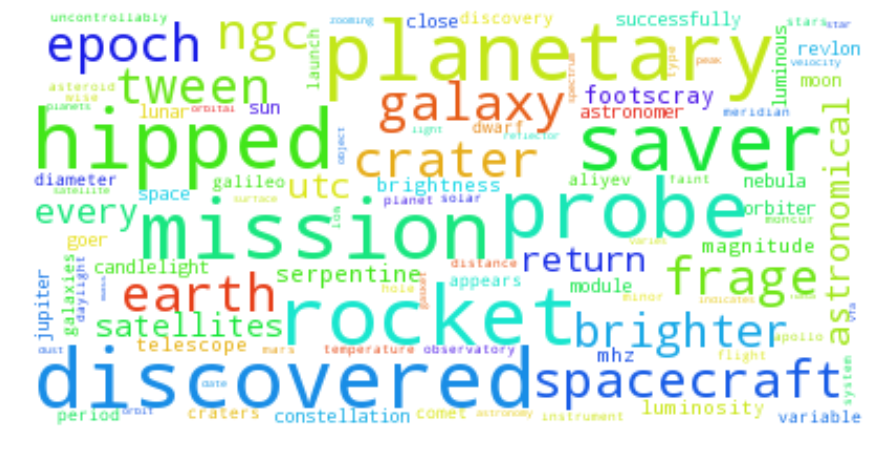

In [20]:
matplotlib.rcParams['figure.figsize'] = (15.0, 8.0)
WordCloudTopic(0)

# get the topic and the score for a unique word

In [21]:
def getTopicFromWord( unique_word ):
    bow = lda.id2word.doc2bow( [unique_word] )
    topic = lda.get_document_topics(bow)
    if len(topic):
        return topic[0][0]
    else:
        return None


print getTopicFromWord('have')

None


In [22]:
from scipy.sparse import *
from scipy import *
V = dok_matrix((0,100), dtype=float32)

def getTopic_n_topWordsWithinTopics( path ):
    tokens = tokenize(loadText( path ))
    bow = lda.id2word.doc2bow( tokens )
    topics =  lda.get_document_topics(bow)
    complex_topic = dict()
    complex_topic['topics'] = topics
    details = dict()
    max_details = 0
    for t in tokens:
        i = getTopicFromWord( t )
        if i != None:
            if i not in details.keys():
                details[i]  = dict()
            if t not in details[i].keys():
                details[i][t] = 1
            else:
                details[i][t] += 1
                if details[i][t] > max_details:
                    max_details = details[i][t]
                
    V = dok_matrix((1,100), dtype=float32)
    for t in topics:
        V[0,t[0]] = t[1]
    
    complex_topic['semantic_vector'] = V
    complex_topic['details'] = details
    complex_topic['max_details'] = max_details
    return complex_topic


In [23]:
# complex_topics = dict()
# for f in filelist:
#     complex_topics[f] = getTopic_n_topWordsWithinTopics(f)
    
# pickle.dump( complex_topics, open( "topics_from_files.p", "wb" ) )

complex_topics = pickle.load( open( "topics_from_files.p", "rb" ) )

In [24]:
print loadText(f)

  100 days 24 hours per day and 7 days per week and immediacy About KPMG Accessibility Accountant Accounting Advisory Services Accounting considerations for cloud providers Accounting data conversion Accounting Standards Accounting standards Accounting standards convergence Acquisition Cost Recovery Analysis Acquisition due diligence Acquisition financing Acquisition or Disposal Structuring Acquisition strategy Acquisition target profitability analysis Acquisition valuation Actuarial Services Adoption of IFRS Advance Pricing Arrangements Advertising and Direct Marketing Advisory Advocacy Aerospace and Defense Afghanistan Africa African Union Aged and Long Term Care Providers Aging populations Agribusiness Agrochemicals AIMFD Air Cargo Air Traffic Control Companies Air Transportation Airlines Airlines and Airports Airport Operators Airports Aland Islands Albania Alcoholic Beverages Algeria Alternative energy Alternative Investment Fund Managers Directive Alternative Investments Alumni A

# display main topics and the top words from the text within a topic

In [25]:
f = random.choice(filelist)
print f
x = complex_topics[f]
x_topics = x['topics']
x_details = x['details']
for i in sorted(x_topics, key=lambda tup: tup[1], reverse = True):
    print "score: %s " %i[1] + "| topic: %s" %topic_names[i[0]] + " | id topic: %s" %i[0]
    d = x_details[i[0]]
    for w in sorted(d, key=d.get, reverse=True)[:10]:
        print "-----  " + str(w) + ": " + str(d[w])

all_source_texts/Team Sprout_en-GB-en-it-T.mxliff
score: 0.268538338365 | topic: positive words - marketing | id topic: 78
-----  sprout: 5
-----  sell: 1
-----  give: 1
-----  brilliant: 1
-----  away: 1
-----  quickly: 1
-----  try: 1
-----  thing: 1
-----  bare: 1
-----  child: 1
score: 0.253665588864 | topic: business - distribution | id topic: 25
-----  sustainability: 5
-----  ceo: 2
-----  consumer: 1
-----  sale: 1
-----  supermarket: 1
-----  project: 1
-----  innovative: 1
-----  accounting: 1
-----  investor: 1
-----  lease: 1
score: 0.213841836035 | topic: Legal | id topic: 72
-----  com: 11
-----  email: 10
-----  product: 3
-----  customer: 1
-----  communication: 1
-----  controller: 1
-----  developer: 1
score: 0.0688750898288 | topic: art | id topic: 48
-----  pencil: 3
-----  art: 1
-----  illustrating: 1
score: 0.039799238984 | topic: human ressources | id topic: 81
-----  idea: 3
-----  comprehensible: 1
-----  existence: 1
-----  difference: 1
-----  consciousness:

# similarity

In [26]:
def norm(v):
    s = 0
#     it = v.itervalues()
#     while it:
#         s+= it
#         it.next()
    for d in v.itervalues():
        s+= d**2
    return sqrt(s)

def similarity( a, b):
    # cosine similarity
    p = (a.dot(b.transpose()) / (norm(a) * norm(b))).data
    if len(p):
        return p[0]


def closestFile( path , printit = False ):
    x = getTopic_n_topWordsWithinTopics(path)
    u = x['semantic_vector']
    print type(u)
    similarities = dict()
    for s in complex_topics:
        v = complex_topics[s]['semantic_vector']
        similarities[s] = similarity(v,u)  
        
    if printit:
        k = 1
        for i in sorted(similarities.items(), key=lambda x: x[1])[::-1][:15]:
            print str(k) + "  |  "  + str(i)
            k += 1
        
    return similarities

In [27]:
path = u"all_source_texts/Turkish_Basketball_Clubs_Evaluationprogramme15-16_Repucom_150612_Übersetzten-en-tr-T.mxliff"
closestFile( path, printit = True )

<class 'scipy.sparse.dok.dok_matrix'>
1  |  ('all_source_texts/Turkish_Basketball_Clubs_Evaluationprogramme15-16_Repucom_150612_\xdcbersetzten-en-tr-T.mxliff', 0.91898885254993712)
2  |  ('all_source_texts/ilv_presentation_v13.7_141111_ey_ds-2-en-zh-T.mxliff', 0.91705896483770355)
3  |  ('all_source_texts/russian_name.mxliff', 0.87412040607860619)
4  |  ('all_source_texts/292 GB_ImageBrochure_Aqua_2014-en-ru-T.mxliff', 0.83682141592496595)
5  |  ('all_source_texts/291 GB_ImageBrochure_Petfood_2014-en-ru-T.mxliff', 0.83554577040466638)
6  |  ('all_source_texts/320_GB_Plant_and_process_controls_ny-en-de-T.mxliff', 0.83503073321521892)
7  |  ('all_source_texts/Text variables for on-screen feedback_Final[1]-en-fr-T.mxliff', 0.82149215602010961)
8  |  ('all_source_texts/290 GB ImageBrochure_Animal_2014-en-ru-T.mxliff', 0.80776528266722147)
9  |  ('all_source_texts/258_GB_produktbrochure_extruder_pet_aqua-en-ru-T.mxliff', 0.80062409301516391)
10  |  ('all_source_texts/content_no-en-no-T.mxli

{'all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOUT_ STICKERS SECTION 5-en-fr_ca-CR.mxliff': None,
 'all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOUT_STICKERS SECTION 1-en-fr_ca-CR.mxliff': 0.0022283971731741118,
 'all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOUT_STICKERS SECTION 3-en-fr_ca-CR.mxliff': None,
 'all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOUT_STICKERS SECTION 4-en-fr_ca-CR.mxliff': None,
 'all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOUT_STICKERS SECTION 6-en-fr_ca-CR.mxliff': None,
 'all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOU_ STICKERS SECTION 2-en-fr_ca-CR.mxliff': None,
 'all_source_texts/1844-0001 MEGA S&A Dinosaurs PLC V4-en-fr_ca-CR.mxliff': 0.0011911758474680741,
 'all_source_texts/1844-0001 Mega Giant S&A Dinosaurs UK AMENDED-en-fr_ca-CR.mxliff': None,
 'all_source_texts/1920-0001 Fairy Interiors-en-fr_ca-CR.mxliff': None,
 'all_source_texts/1920-0001 

In [28]:
path = u"all_source_texts/1920-0002 Princess Interiors-en-fr_ca-CR.mxliff"
closestFile( path )

<class 'scipy.sparse.dok.dok_matrix'>


{'all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOUT_ STICKERS SECTION 5-en-fr_ca-CR.mxliff': 0.054962683628386889,
 'all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOUT_STICKERS SECTION 1-en-fr_ca-CR.mxliff': 0.12906534572667072,
 'all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOUT_STICKERS SECTION 3-en-fr_ca-CR.mxliff': 0.2487184183238183,
 'all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOUT_STICKERS SECTION 4-en-fr_ca-CR.mxliff': 0.33943488782354031,
 'all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOUT_STICKERS SECTION 6-en-fr_ca-CR.mxliff': 0.63035209121404656,
 'all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOU_ STICKERS SECTION 2-en-fr_ca-CR.mxliff': 0.14085157072794208,
 'all_source_texts/1844-0001 MEGA S&A Dinosaurs PLC V4-en-fr_ca-CR.mxliff': 0.16686251205106109,
 'all_source_texts/1844-0001 Mega Giant S&A Dinosaurs UK AMENDED-en-fr_ca-CR.mxliff': 0.33570292414474995,
 'all_source_te

# display the results as a graph

In [29]:
TRESHOLD = 2

colours = []
colours.append( (26, 188, 156))
colours.append( (52, 152, 219))
colours.append( (155, 89, 182))
colours.append( (241, 196, 15))
colours.append( (231, 76, 60))
colours.append( (46, 204, 113))
colours.append( (230, 126, 34))
colours.append( (149, 165, 166))
colours.append( (52, 73, 94))

class idGenerator:
    def __init__(self):
        self.id = 0
    def get(self):
        self.id += 1
        return self.id - 1
    
    
class node:
    def __init__(self, index, label, weight = 30., color = (236, 240, 241)):
        self.index = index
        self.label = label
        self.childs = []
        self.weight = weight
        self.connections = None
        self.groups = []
        self.color = color
    def addChild( self, c ):
        self.childs.append( c )
        
    def getGraph(self):
        self.connections = []
        self.groups.append(0)
        graph = nx.Graph()
        graph.add_node( self.index, weight = self.weight, label = self.label, color = self.color)
        k = 0
        for c in self.childs: 
            color = colours[k]
            group = []
            k+=1
            if k >= len(colours):
                k = 0
            self.groups.append( k )
            graph.add_node( c.index, weight = c.weight, label = c.label, color = c.color)
            graph.add_edge(self.index, c.index )
            self.connections.append([ self.index, c.index, 0.1 ])
            for cc in c.childs:
                graph.add_node( cc.index, weight = cc.weight, label = cc.label, color = cc.color)
                graph.add_edge(c.index, cc.index )
                self.connections.append([ c.index, cc.index, 0. ])
                self.groups.append( 0 )
        return graph
    
    def getPos(self, sizeX = 5, sizeY = 15):
        X = []
        Y = []
        X.append(0)
        Y.append(  sizeY/2 )
        n = len(self.childs)
        cur = 0
        offset = 0.5
        for i in range(0, n):   
            c = self.childs[i]
            m = len(c.childs)
            w = c.weight
            X.append(3 * sizeX / 5)
            Y.append( cur  )
            offsetY = w * sizeY
            for j in range(0,m):
                # set word nodes position
                X.append( sizeX )# + 0.5* math.cos( 2 * 3.12 * j / m) )
                Y.append( cur + offset +  j/m * w * (sizeY - offset) - offsetY / 2)#+ 0.5 * math.sin( 2 * 3.12 * j / m))
            
            # set topics nodes postions
            cur += offsetY
            
        Y = [ sizeY - y for y in Y]      
        return X,Y
    
def makeGraphFromText( f ):
    id = idGenerator()
    x = complex_topics[f]
    x_topics = x['topics']
    x_details = x['details']
    max_details = x['max_details']
    text_node = node( id.get() , f)
    k = 1
    for i in sorted(x_topics, key=lambda tup: tup[1], reverse = True):
        if i[1] > min_score:
            color = colours[k]
            k+=1
            if k >= len(colours):
                k = 0
            topic_node = node( id.get(), topic_names[i[0]], weight = 50 * i[1], color = color )
            d = x_details[i[0]]
            # add words from text
            for w in sorted(d, key=d.get, reverse=True)[:10]:
                if d[w] > 1:
                    detail_node = node( id.get(), str(str(w) + ": " +  str(d[w])), weight =  18 * float(d[w]) / float(max_details))
                    topic_node.addChild(detail_node)
            # add words from topics
            for w in sorted(topics[i[0]], key=topics[i[0]].get, reverse=True)[:20]: 
                detail_node = node( id.get(), str(str(w) + ": " +  str(topics[i[0]][w])), weight =  300 * float(topics[i[0]][w]), color = color )
                topic_node.addChild(detail_node)

            text_node.addChild( topic_node )
            
    return text_node

In [30]:
# https://desolate-castle-4773.herokuapp.com/sessions/

f = random.choice(filelist)
G = makeGraphFromText( f )

print f
graph = G.getGraph()
connections = G.connections
groups = G.groups
X,Y = G.getPos(2 , 30)
mat = asarray(nx.adjacency_matrix(graph).todense())
weights =  nx.get_node_attributes(graph, 'weight').values()
labels = nx.get_node_attributes(graph, 'label').values()
colors = nx.get_node_attributes(graph, 'color').values()
colors = np.vstack(colors)

lgn.force(mat, size = weights, labels = labels, color = colors)

all_source_texts/Text variables for on-screen feedback_Final[1]-en-fr-T.mxliff


C:\Anaconda3\envs\py27\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


# topic distribution along a text

In [31]:
def split_seq(seq, num_pieces):
    start = 0
    for i in xrange(num_pieces):
        stop = start + len(seq[i::num_pieces])
        yield seq[start:stop]
        start = stop
        
def getTopicsDistributionWithinTheText(path, chunk_length = 300 ):
    
    global_scores = topicsFromFiles(path)
    text = loadText(path)
    words = text.split()
    average = textstat.flesch_reading_ease(text)
    scores = dict()
    for i in sorted(global_scores, key=lambda tup: tup[1], reverse = True):
        if i[1] > min_score:
            scores[i[0]] = []
    x = []
    y = []
    cur = 0
    i = 1
    while ( cur < len(words) ):
        sub = words[cur:cur+chunk_length]
        sub.append('.')
        sub_text = ' '.join(sub)
        cur += chunk_length
        
        bow = lda.id2word.doc2bow(raw_tokenize(sub_text))
        score = lda.get_document_topics(bow)
        for s in score:
            if s[0] in scores.keys():
                scores[s[0]].append(s[1])
                
        for s in scores:
            if len(scores[s]) < i:
                scores[s].append(0)
        i += 1
        
        
#     text = loadText(path)
#     tokens = raw_tokenize(text)
#     steps = int(len(tokens) / words)
#     if steps < 2:
#         steps = 2
#     bow = lda.id2word.doc2bow(tokens)
#     global_scores = topicsFromFiles(path)
#     scores = dict()
#     for i in sorted(global_scores, key=lambda tup: tup[1], reverse = True):
#         if i[1] > min_score:
#             scores[i[0]] = []
#     chunks = split_seq(tokens, steps)
#     i = 1
#     for c in chunks:
#         bow = lda.id2word.doc2bow(c)
#         score = lda.get_document_topics(bow)
#         for s in score:
#             if s[0] in scores.keys():
#                 scores[s[0]].append(s[1])
                
#         for s in scores:
#             if len(scores[s]) < i:
#                 scores[s].append(0)
#         i += 1
        
    return scores, global_scores
    

all_source_texts/1412 Standard English Review-en-ru-T.mxliff


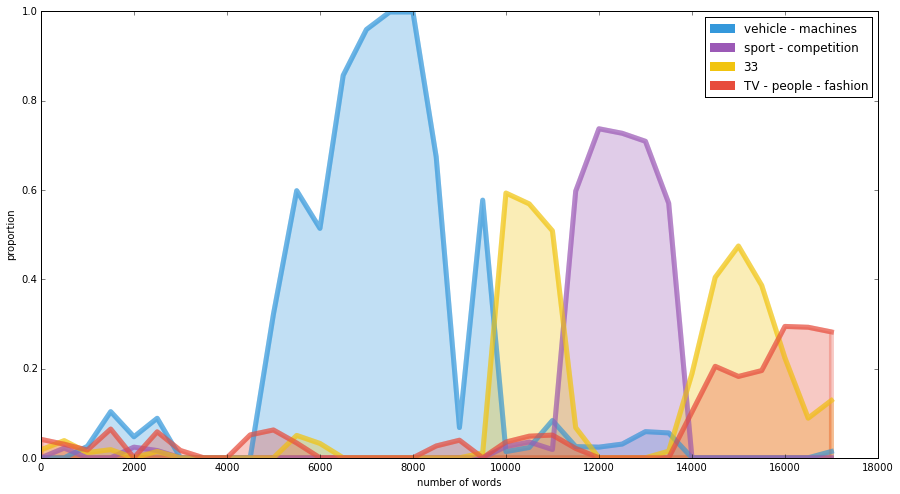

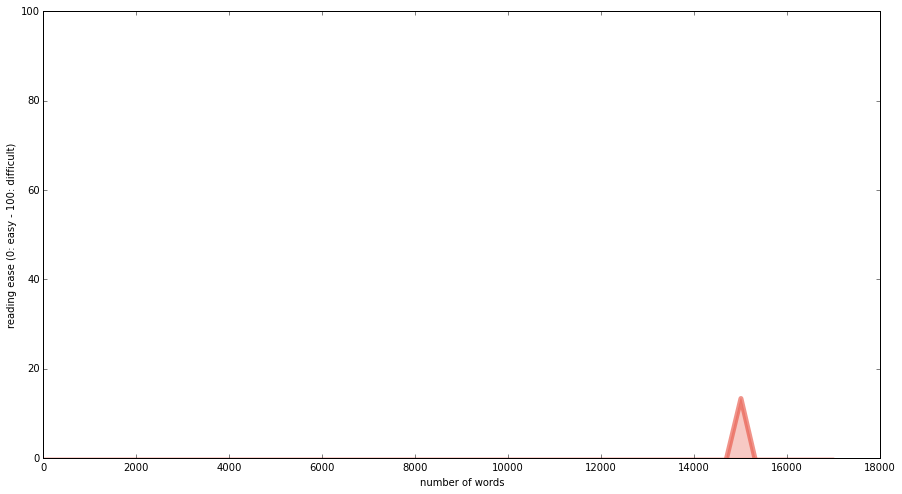

In [58]:
import numpy as np
from scipy import interpolate
from scipy.interpolate import interp1d
import matplotlib.patches as mpatches

f = random.choice(filelist)
print f

def displayTopicsDistributionWithinTheText(f, chunk_length = 300, dispLabels = True,pie = False):

    distribAlongText, global_scores = getTopicsDistributionWithinTheText(f, chunk_length)

    global_scores =  sorted(global_scores, key=lambda tup: tup[1], reverse = True)
    scores = []
    for g in global_scores:
        if g[0] in distribAlongText.keys():
            scores.append( distribAlongText[g[0]])
    
    values = []
    labels = []
    somme= 0.
    for s in global_scores:
        if s[1] > min_score:
            values.append(s[1])
            somme+= s[1]**2
            labels.append(topic_names[s[0]])

    values = [ float(v)/float(somme) for v in values]
    
    if pie:
        # draw pie chart
        matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)  
        plt.pie(values,  labels=labels, colors = [ [1.0 / 255.0 * c for c in cc] for cc in colours[1:]])
        plt.show()
    
    
    matplotlib.rcParams['figure.figsize'] = (15.0, 8.0)
    patches = []    
    x = range( 0, len(scores[0]))
    x = [ chunk_length * i for i in x]
    i = 0
    k = 1
    for s in scores:
        c = [ 1.0 / 255.0 * c for c in colours[k]]
        plt.plot(x, s,linewidth = 5, color = c, alpha = 0.6)
        plt.fill_between(x, s,linewidth = 5, color = c, alpha = 0.3)
        patches.append(mpatches.Patch(color=c, label=labels[i]))
        k += 1
        i +=1
        if k >= len(colours):
            k = 0
            
    if dispLabels:
        plt.legend(handles=patches)
        plt.ylabel('proportion')
        plt.xlabel('number of words')
    else:
        plt.axis('off')
    
    plt.show()
    
displayTopicsDistributionWithinTheText(f, 500)
complexityAlongtheText(f, 500) 

# Complex words

In [38]:
def getlongwords( path ):
    text = loadText(path)
    tokens = tokenize(text)
    f = nltk.FreqDist(tokens)
    result = dict()
    tokens = sorted(set(tokens), key=lambda w: len(w), reverse = True)
    for w in sorted(set(tokens), key=lambda w: len(w), reverse = True)[:15] :
        print w + ": " +  str(f[w])
        
    return tokens
 
# path = u"all_source_texts/1920-0002 Princess Interiors-en-fr_ca-CR.mxliff"
path = u"all_source_texts/Turkish_Basketball_Clubs_Evaluationprogramme15-16_Repucom_150612_Übersetzten-en-tr-T.mxliff"

r = getlongwords( path )

representative: 1
amplification: 1
understanding: 3
effectiveness: 1
demonstrating: 1
extrapolation: 1
extrapolated: 1
intelligence: 1
segmentation: 1
benchmarking: 1
satisfaction: 1
introduction: 1
proposition: 1
requirement: 1
sponsorship: 20


# construct a corpus to compute frequencies

In [39]:
import nltk
from nltk.corpus import reuters
# print  "corpus with: %s words (%s distincts) " %(len(reuters.words()), len(set(reuters.words())))

freq_english = nltk.FreqDist(reuters.words())

In [40]:
freq_english["satisfaction"]

6

In [41]:
def getMostSignificativeWords( path ):
    text = loadText(path)
    tokens = tokenize(text)
    f = nltk.FreqDist(tokens)
    word_set = set(tokens)
    result = dict()
    for w in word_set:
        score = len(w)  / np.log(2 +  freq_english[w])
        result[w] = score
    return result

def CloudFromSignificantWords( path, img_path ):
    words = getMostSignificativeWords(path)
    items = []
    for w in sorted(words, key=words.get, reverse=True)[:100]:
        items.append( (w, words[w]))
    printCloud( items, img_path )

In [46]:
f = random.choice(filelist)

# get most significative words per topic

In [47]:
# mostSignificative = getMostSignificativeWords(path)
# for w in sorted(mostSignificative, key=mostSignificative.get, reverse=True)[:10]:
#     print  str(w) + ": " + str(mostSignificative[w])

# CloudFromSignificantWords(path, "image.jpg")

# for w in significant:
#     print w +":   " + str(getTopicFromWord(w))
    
    

print f
x = complex_topics[f]
x_topics = x['topics']
x_details = x['details']
significant = getMostSignificativeWords(f)
significants_words_per_topic = dict()
for i in x_topics:
    significants_words_per_topic[i[0]] = dict()
    
others = dict()
for w in significant:
    t = getTopicFromWord(w)
    if t in significants_words_per_topic.keys():
        y = dict()
        significants_words_per_topic[t][w] = significant[w]
    else:
        others[w] = significant[w]
    
    
    
for i in sorted(x_topics, key=lambda tup: tup[1], reverse = True):
    print "score: %s " %i[1] + "| topic: %s" %topic_names[i[0]] + " | id topic: %s" %i[0]
    d = significants_words_per_topic[i[0]]
    for w in sorted(d, key=d.get, reverse=True)[:10]:
        print "-----  " + str(w) + ": " + str(d[w])

print "no topics:"
d = others
for w in sorted(d, key=d.get, reverse=True)[:10]:
    print "-----  " + str(w) + ": " + str(d[w])

all_source_texts/ANR script_Final_Translation Template-deadline 20. april-en-da-T.mxliff
score: 0.39524925279 | topic: positive words - marketing | id topic: 78
-----  intrigued: 12.984255368
-----  beautiful: 12.984255368
-----  inspires: 11.5415603271
-----  passionate: 9.10239226627
-----  glide: 7.21347520444
-----  woman: 7.21347520444
-----  trick: 7.21347520444
-----  incredible: 7.21347520444
-----  pretend: 6.37167458639
-----  shocked: 6.37167458639
score: 0.282288218822 | topic: health | id topic: 40
-----  groundbreaking: 20.1977305724
-----  untreated: 12.984255368
-----  nighttime: 12.984255368
-----  hydration: 12.984255368
-----  fatigue: 10.0988652862
-----  sponge: 8.65617024533
-----  serum: 7.21347520444
-----  experiencing: 5.77078016356
-----  caring: 5.46143535976
-----  sleep: 4.55119613313
score: 0.126225289887 | topic: Legal | id topic: 72
-----  optimized: 12.984255368
-----  sync: 5.77078016356
-----  screen: 4.32808512267
-----  incorrect: 3.90865033713
---

# graph from the most meaningful words

In [48]:
min_similarity = 0.5

def makeGraphFromText_significant_words( f, show_translators = True ):
    id = idGenerator()
#     x = complex_topics[f]
#     x_topics = x['topics']
#     x_details = x['details']
#     max_details = x['max_details']
#     print x_topics
    # topics
    x_topics = topicsFromFiles( f )
    #significant words
    significant = getMostSignificativeWords(f)
    significants_words_per_topic = dict()
    for i in x_topics:
        significants_words_per_topic[i[0]] = dict()
        
    max_significant = max(significant.values())

    others = dict()
    for w in significant:
        t = getTopicFromWord(w)
        if t in significants_words_per_topic.keys():
            y = dict()
            significants_words_per_topic[t][w] = significant[w]
        else:
            others[w] = significant[w]
            
            
    #initialize first node
    text_node = node( id.get() , f)
    # add translators
    if show_translators:
        closeFiles = closestFile(f)
        files = []
        for i in sorted(closeFiles.items(), key=lambda x: x[1])[::-1][:5]:
#             if i[1] > min_similarity:
            other_text_node = node( id.get(), str(i[0]) + ": "  + str(i[1]), weight = 2 + 10 * i[1]**i[1] )
            ts = translated_by[i[0]]
            for t in ts:
                translator_node = node( id.get(), t, weight = 5 )
                other_text_node.addChild( translator_node)
            text_node.addChild( other_text_node )
                      
    #add topics
    k = 1
    for i in sorted(x_topics, key=lambda tup: tup[1], reverse = True):
        if i[1] > min_score:
            color = colours[k]
            k+=1
            if k >= len(colours):
                k = 0
            topic_node = node( id.get(), topic_names[i[0]], weight = 3 + 40 * i[1], color = color )
#             d = x_details[i[0]]
            # add words from text
#             for w in sorted(d, key=d.get, reverse=True)[:10]:
#                 if d[w] > 1:
#                     detail_node = node( id.get(), str(str(w) + ": " +  str(d[w])), weight =  18 * float(d[w]) / float(max_details))
#                     topic_node.addChild(detail_node)
            # add words from topics
#             for w in sorted(topics[i[0]], key=topics[i[0]].get, reverse=True)[:20]: 
#                 detail_node = node( id.get(), str(str(w) + ": " +  str(topics[i[0]][w])), weight =  300 * float(topics[i[0]][w]), color = color )
#                 topic_node.addChild(detail_node)
                
            # add significant words
            d = significants_words_per_topic[i[0]]
            for w in sorted(d, key=d.get, reverse=True)[:20]:
                if d[w] > 1:
                    detail_node = node( id.get(), w , weight =  5 + 15 * float(d[w]) / float(max_significant), color = color)
                    topic_node.addChild(detail_node)

            text_node.addChild( topic_node )
            
#     d = others
#     for w in sorted(d, key=d.get, reverse=True)[:15]:
#         if d[w] > 1:
#             detail_node = node( id.get(), w , weight =  20 * float(d[w]) / float(max_details))
#             text_node.addChild(detail_node)
            
    return text_node

In [49]:
# https://desolate-castle-4773.herokuapp.com/sessions/

f = random.choice(filelist)
G = makeGraphFromText_significant_words( f, show_translators = False )

print f
graph = G.getGraph()
connections = G.connections
groups = G.groups
X,Y = G.getPos(2 , 30)
mat = asarray(nx.adjacency_matrix(graph).todense())
weights =  nx.get_node_attributes(graph, 'weight').values()
labels = nx.get_node_attributes(graph, 'label').values()
colors = nx.get_node_attributes(graph, 'color').values()
colors = np.vstack(colors)

lgn.force(mat, size = weights, labels = labels, color = colors)

all_source_texts/Vecka 32-6 (426-479)-en-nb_no-T.mxliff


# text complexity

In [50]:
# https://pypi.python.org/pypi/textstat/
from textstat.textstat import textstat

difficulties = dict()
for f in filelist:
    txt = unicode(loadText(f))
    try:
        difficulties[f] = textstat.flesch_reading_ease((txt))
    except:
        print "fail:" + str(f)
        
# print textstat.automated_readability_index((f))
# print loadText(f)

C:\Anaconda3\envs\py27\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


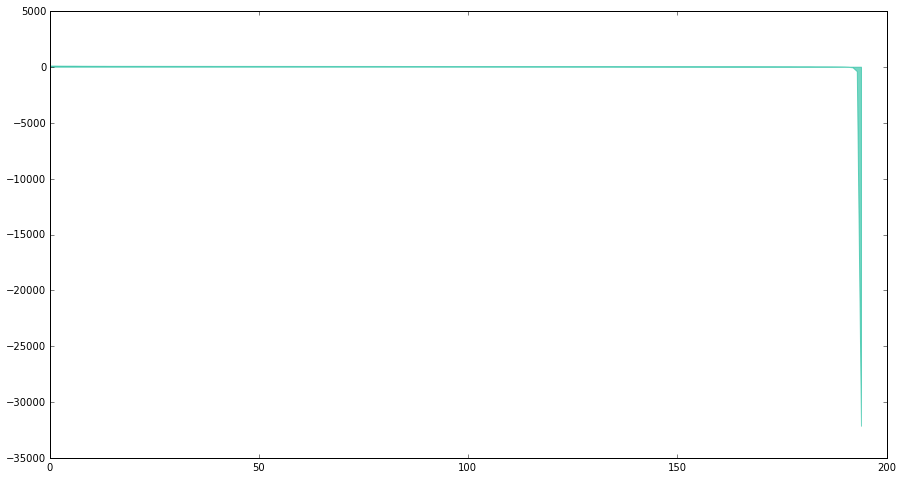

In [51]:
plt.fill_between(range(0,len(difficulties)),sorted(difficulties.values(), reverse = True), color = [ 1.0 / 255.0 * c for c in colours[0]], alpha = 0.6)

# complexity along the text

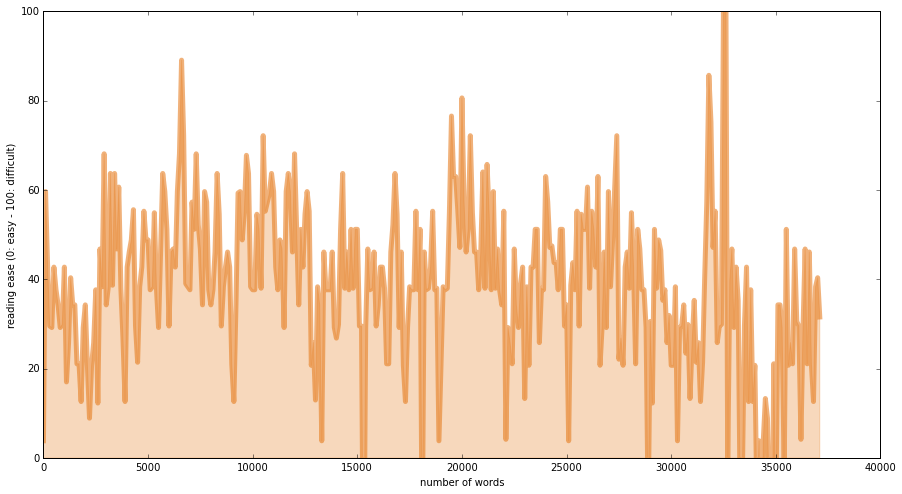

In [52]:
from textstat.textstat import textstat

def complexityAlongtheText( f, chunk_length = 100 ):
    text = loadText(f)
    words = text.split()
    x = []
    y = []
    cur = 0
    average = textstat.flesch_reading_ease(text)
    
    while ( cur < len(words) ):
        sub = words[cur:cur+chunk_length]
        sub.append('.')
        sub_text = ' '.join(sub)
        y.append( textstat.flesch_reading_ease(sub_text)  )
        x.append(cur)
        cur += chunk_length
        
    if average < 20:
        col = colours[4]
    elif average < 40:
        col = colours[6]
    elif average < 60:
        col = colours[3]
    elif average < 80:
        col = colours[1]
    else:
        col = colours[0]
    plt.plot(x,y, color = [ 1.0 / 255.0 * c for c in col], alpha = 0.6, linewidth = 5)    
    plt.fill_between(x,y, color = [ 1.0 / 255.0 * c for c in col], alpha = 0.3)
#     plt.plot( [0,max(x)], [average,average], color = 'gray')
    plt.ylim([0,100])
    plt.xlabel("number of words")
    plt.ylabel("reading ease (0: easy - 100: difficult)")
    plt.show()
    
# f = random.choice(filelist)
# print textstat.flesch_reading_ease(loadText(f))
complexityAlongtheText(f) 

# sentiment analysis

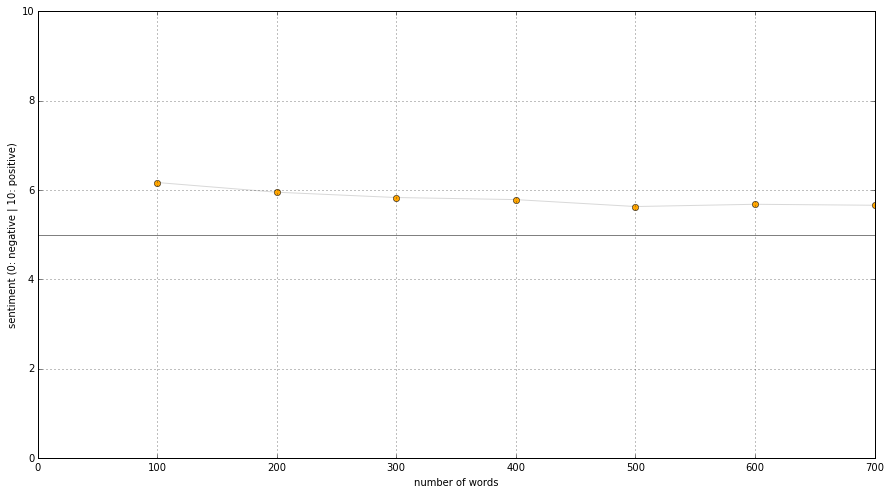

2.64
7.76


In [53]:
import numpy as np
from matplotlib.pyplot import figure, show, cm
file = open('Data_Set_S1.txt', 'r')
sentiments_dataset = file.readlines()
word_sentiment = dict()
for l in sentiments_dataset:
    if len(l) and l[0] != '!':
        ll = l.split('\t')
        word_sentiment[ll[0]] = float(ll[2])
        

def calculateSentiment( tokens ):
    s = 0.0
    keys = set(word_sentiment.keys())
    total = 0
    for t in tokens:
        if t in keys:
            s += word_sentiment[t]
            total +=1
#         else:
#             s += 5.
    if s:
        return float(s)/float(total)
    else:
        return 0.0

text = loadText(path)
tokens = tokenize(text)
calculateSentiment(tokens)

def sentimentAcrossText(tokens,N = 100 ):
    id_word = []
    y = []
    k = 0

    while (k < len(tokens)):
        i = 0
        tmp_tokens = []
        while k < len(tokens) and i < N:
            x = tokens[k]
            tmp_tokens.append(x)
            i+=1
            k +=1
        id_word.append(k)
        y.append(calculateSentiment(tmp_tokens))
    plt.plot(id_word, y,'-', color = 'gray', alpha = 0.3)
    plt.plot(id_word, y,'o' ,color = 'orange', alpha = 1)
    plt.ylim([0,10])
    plt.grid("on")
    plt.plot( [0,max(id_word)], [5,5], color = 'gray')
    plt.xlabel('number of words')
    plt.ylabel('sentiment (0: negative | 10: positive)')
    plt.show()
    
sentimentAcrossText( tokens )

print calculateSentiment( raw_tokenize(" bad "))
print calculateSentiment( raw_tokenize(" wonderful"))

# Test all on a text

In [54]:
path = u"all_source_texts/babyshop texter vecka 33-en-fi-T.mxliff"
# path = u"all_source_texts/Re-Nutriv Script_Final Translation Template_deadline 20. april-en-da-T.mxliff"
path = u"all_source_texts/joined-P4193-J1-2-en-it-T.mxliff"
# path = random.choice(filelist)
# path = 'storyforchild.txt'
# path = 'essay_total.txt'
# path = 'mix.txt'
print loadText(path)

  teamSettings normalSettings selectDictionaries selectPlayers selectTeams options managePlayers manageDictionaries credits more incognito incognitoWithName incognitoEdit roundTime colorsAvailable dictionary passPenalty dictionariesStandard dictionariesUser sound music language enoughWords deleteObject editDictionary cancelDictionary reconnect playerGameCap playerCap wordCap dictionaryCap quitGame yourTurn sketcher start tapto results correctGuesses correctDrawings tutorial1 tutorial2 tutorial3 howtoplay1 howtoplay2 howtoplay3 howtoplay4 howtoplay5 howtoplay6 howtoplay7 howtoteam1 howtoteam2 howtoteam3 howtoteam4 howtoteam5 howtoteam6 howtoteam7 keyDictionaryName keyWord keyPlayerName keyWordUpdate keyValidation1 keyValidation2 keyValidation3 keyValidation4 btnIncognito1 btnIncognito2 btnAll btnBack btnClear btnCorrect btnSelect btnGallery btnMenu btnMore btnNext btnOptions btnPass btnPlay btnRematch btnScores btnSettings btnStandard btnTakePic btnRetake btnTeam Corrected TEAM GAME SET

all_source_texts/joined-P4193-J1-2-en-it-T.mxliff
stats
number of words 2558
number of sentences 125
uniques words: 1120
Reading Ease 52.19 / 100 (hard:0 - easy: 100)
Average sentiment 5.63006903877 (negative: 0, neutral: 5, positive: 10)

topic distribution


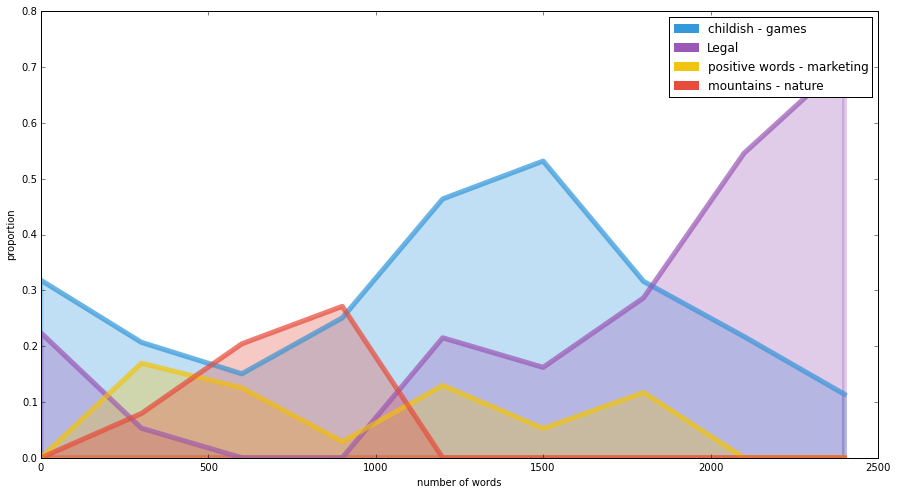

difficulty over the text 


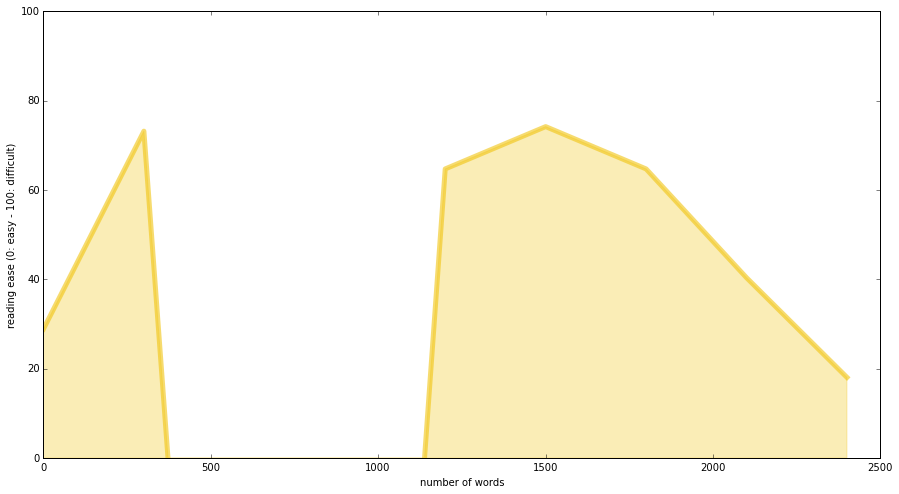

In [55]:
print path
print "stats"
text = loadText(path)
raw_tokens = raw_tokenize(text)
print "number of words %s" %count_words(text)
print "number of sentences %s" %textstat.sentence_count(text)
print "uniques words: %s" %len(set(raw_tokenize(text)))
print "Reading Ease %s / 100 (hard:0 - easy: 100)" %textstat.flesch_reading_ease(text)
print "Average sentiment %s (negative: 0, neutral: 5, positive: 10)"%calculateSentiment(raw_tokens)
# print "dale_chall_readability_score %s / 100" %textstat.dale_chall_readability_score(text)
print
# print "meaningful words"
# CloudFromSignificantWords(path, "image.jpg")
print "topic distribution"
displayTopicsDistributionWithinTheText(path, 300, pie = False)
print "difficulty over the text "
complexityAlongtheText( path, 300)
# print "sentiments over the texte"
# sentimentAcrossText(raw_tokens)

In [56]:
G = makeGraphFromText_significant_words( path, show_translators = False )
graph = G.getGraph()
connections = G.connections
groups = G.groups
X,Y = G.getPos(2 , 30)
mat = asarray(nx.adjacency_matrix(graph).todense())
weights =  nx.get_node_attributes(graph, 'weight').values()
labels = nx.get_node_attributes(graph, 'label').values()
colors = nx.get_node_attributes(graph, 'color').values()
colors = np.vstack(colors)
lgn.force(mat, size = weights, labels = labels, color = colors)

In [57]:
# mostSignificative = getMostSignificativeWords(path)
# for w in sorted(mostSignificative, key=mostSignificative.get, reverse=True)[:30]:
#     print  str(w) + ": " + str(mostSignificative[w])
    
drawNX(graph)

NameError: name 'drawNX' is not defined

# trash

In [ ]:
# draw graph with networkX


def drawNX(graph):
    i = 0
    matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
    labelsNX = dict()
    for l in labels:
        labelsNX[i] = l
        i += 1

    i = 0
    weightsNX = dict()
    for l in weights:
        weightsNX[i] = l
        i += 1

    pos=nx.spring_layout(graph)
    nx.draw(graph, labels = labelsNX,pos = pos, edge_color = 'gray', node_color  = [ [(1.0/255.0) * cc for cc in c]  for c in colors], node_size  = [ 80 * w for w in weights], alpha = 0.7, font_size = 22)
    plt.show()

In [ ]:
# # graph bundle
# from numpy import random, ceil, array
# import numpy as np
# x = random.randn(10)
# y = random.randn(10)
# mat = random.rand(10,10)
# mat[mat>0.75] = 0

# mat = np.zeros((len(connections), 3))
# # lgn = Lightning(ipython=True, host='http://public.lightning-viz.org')
# # lgn.set_size(size='large')
# print len(x)
# print len(connections)
# for i in range( 0, len(connections)):
#     mat[i,0] = connections[i][0]
#     mat[i,1] = connections[i][1]
#     mat[i,2] = connections[i][2]
    
# mat2 = np.ones((len(X), len(Y)) )
# # print mat2
# # print X
# # print Y

# lgn.graphbundled(X,Y,  mat, size = weights, labels = labels, color = colours)




In [ ]:
freqs = nltk.FreqDist(nltk.corpus.gutenberg.words())
    
printCloud( freqs.most_common(500), "image.jpg")

In [ ]:
# 20, 48, 44, 10; 34, 27
sorted(topics[11].items(), key=lambda x: x[1],reverse = True)

In [77]:
topic_names = dict()
for i in range(0,100):
    topic_names[i] = i
    
topic_names[0] = "space - sci fi"
topic_names[1] = "american football"
topic_names[2] = "design"
topic_names[3] = "japan"
topic_names[4] = "american eduacation"
topic_names[5] = "north carolina"
topic_names[6] = "cities - airports ?"

# topic_names[72] = 'IT'
topic_names[72] = 'Legal'
topic_names[78] = 'positive words - marketing'
topic_names[2] = 'design - clothing'
topic_names[89] = 'nutrition'
topic_names[41] = 'security - emergency'
topic_names[64] = 'colors - nature'
topic_names[83] = 'food'
topic_names[55] = 'clothes - materials'
topic_names[77] = 'TV - people - fashion'
topic_names[29] = 'music industry'
topic_names[81] = 'human ressources'
topic_names[97] = 'science'
topic_names[40] = 'health'
topic_names[73] = 'mountains - nature'
topic_names[16] = 'buildings'
topic_names[25] = 'business - distribution'
topic_names[67] = 'medieval'
topic_names[86] = 'childish - games'
topic_names[94] = 'classical music - composers'
topic_names[24] = 'vehicle - machines'
topic_names[38] = 'law - agreements'
topic_names[57] = 'distribution'
topic_names[69] = 'sport - competition'
topic_names[20] = 'german'
topic_names[48] = 'art'
topic_names[44] = 'IT - telecommunication'
topic_names[10] = 'books - writting - library'
topic_names[14] = 'mathematics'
topic_names[34] = 'doesn\'t look english..'
topic_names[27] = 'IT - startups - business'
topic_names[18] = 'specifications'
topic_names[11] = 'arab culture'

pickle.dump( topic_names, open( "topics_names.p", "wb" ) )

In [ ]:
topics_distrib = dict()

for t in complex_topics:
    for s in complex_topics[t]['topics']:
        if s[0] in topics_distrib.keys():
            topics_distrib[s[0]] += s[1]
        else:
            topics_distrib[s[0]] = s[1]
            
for w in sorted(topics_distrib, key=topics_distrib.get, reverse=True)[:20]:
    print str(w) + ": " + str(topics_distrib[w])
        

In [ ]:
%%html
<iframe src="https://desolate-castle-4773.herokuapp.com/visualizations/88577a1f-8dcf-4891-9bfe-a6c00d7aa2f4/iframe/” width="1200" height="500" >

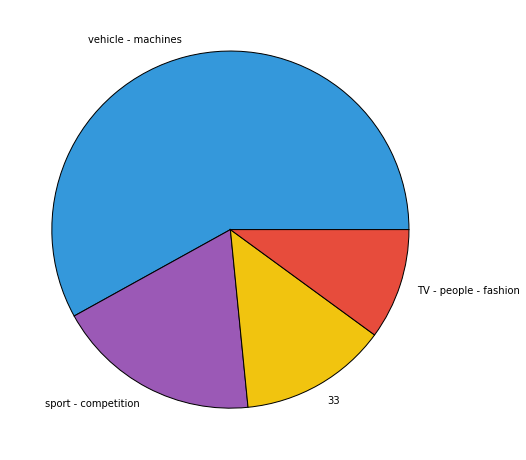

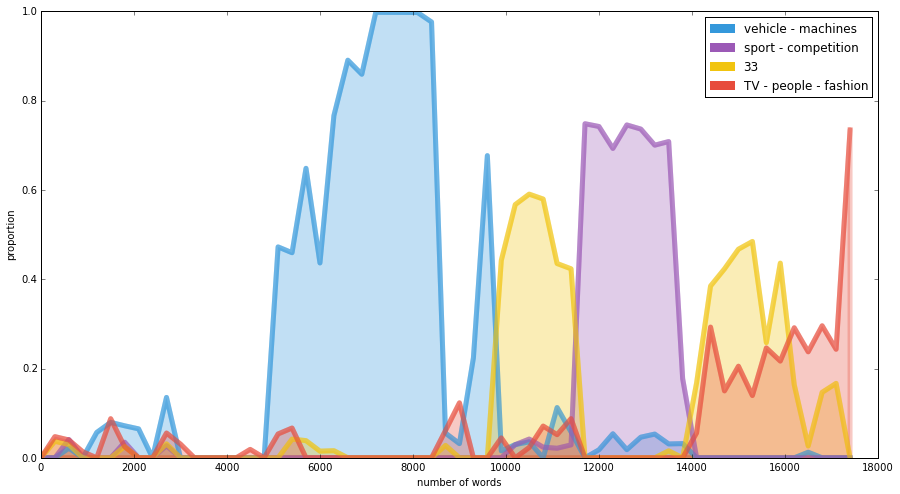

In [63]:
k = 0
for f in filelist:
    if k < 1:
        try:
            displayTopicsDistributionWithinTheText(f, 300, dispLabels = True, pie = True)
            k +=1
        except:
            0
        

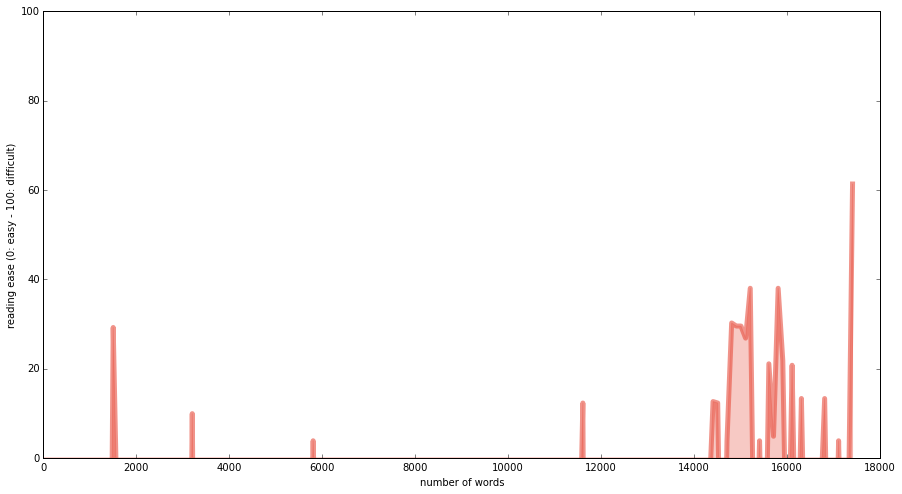

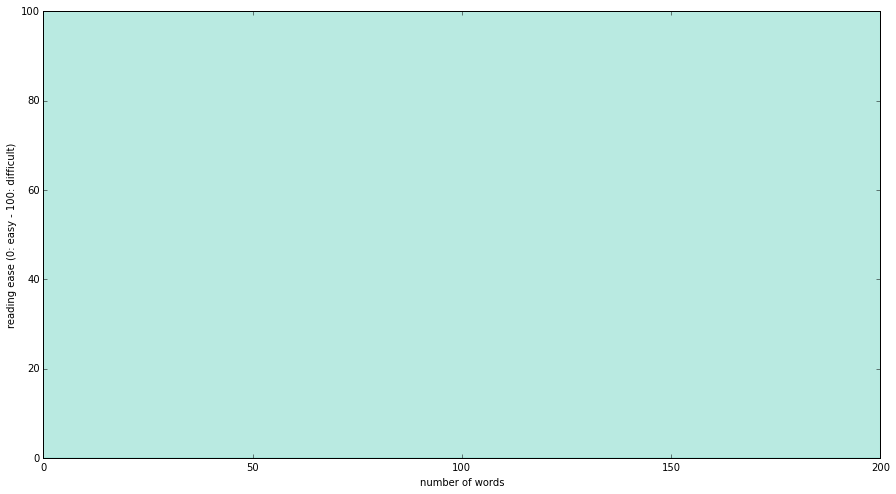

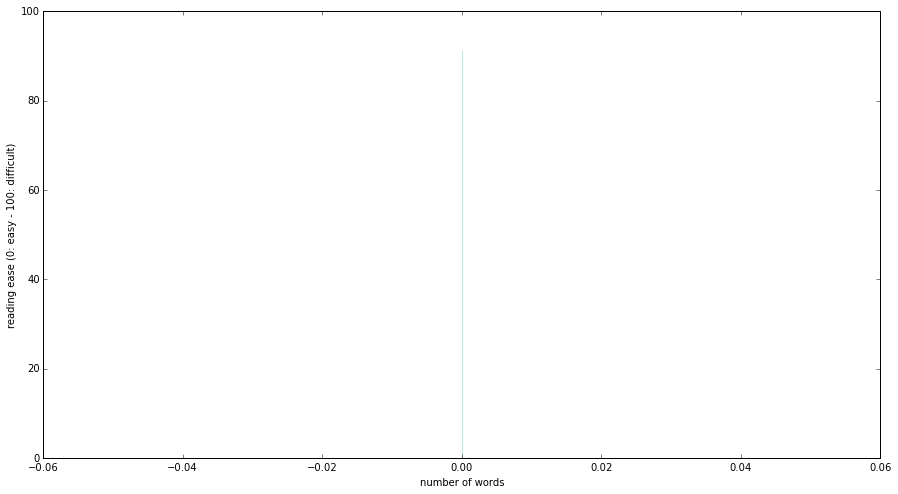

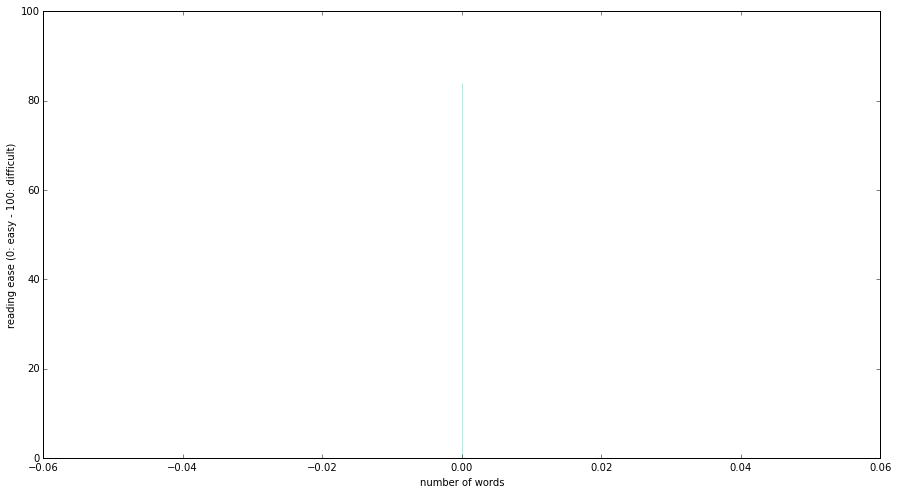

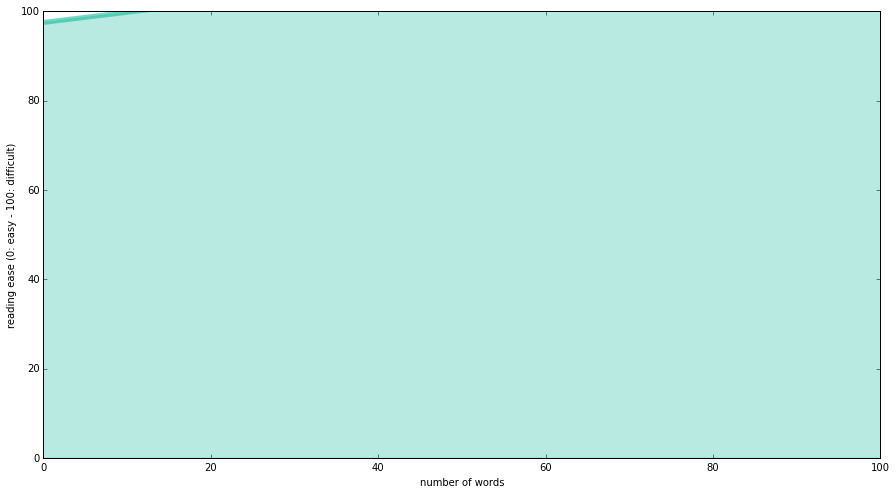

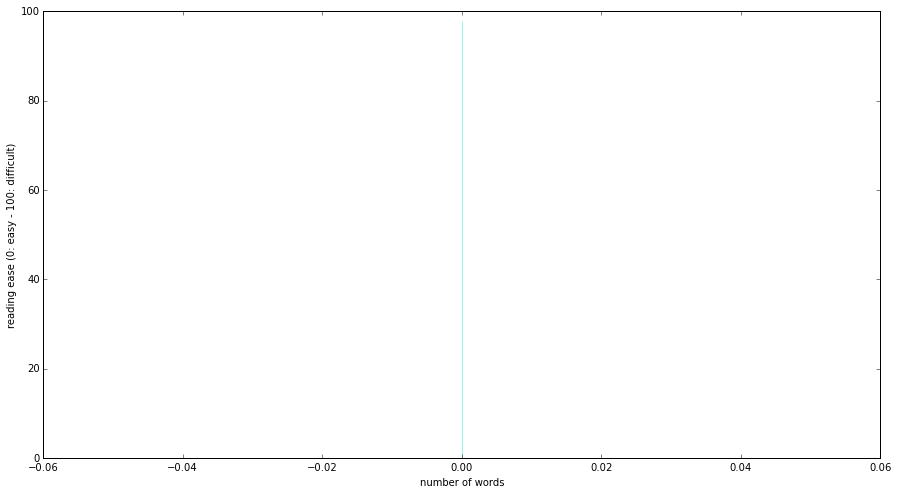

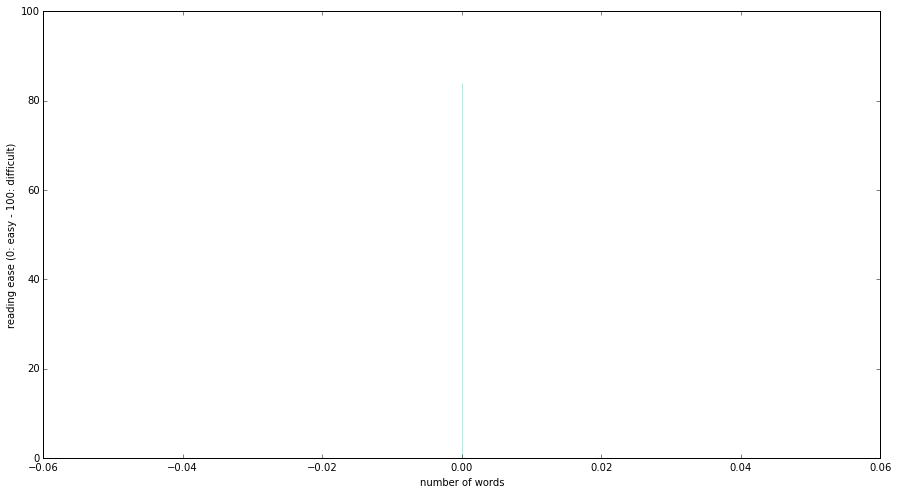

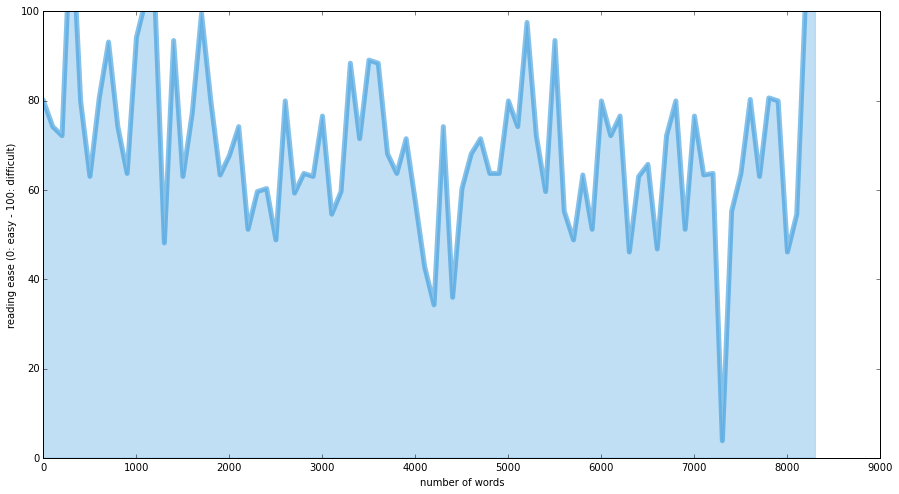

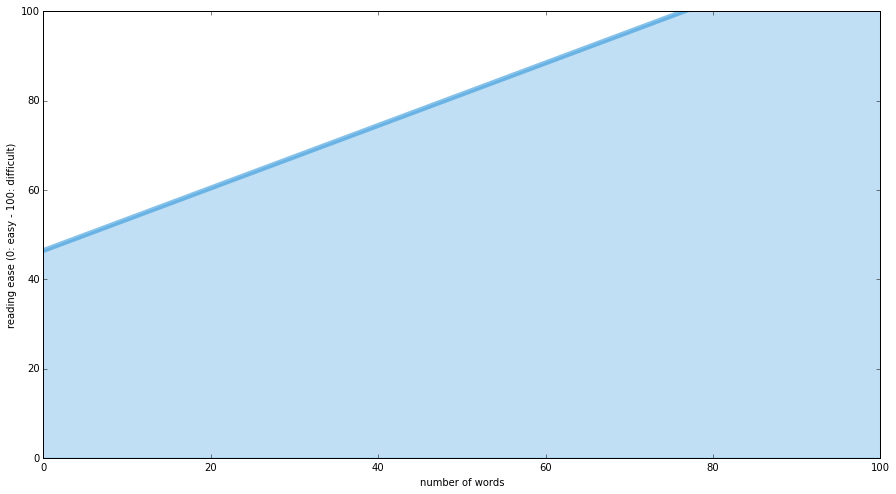

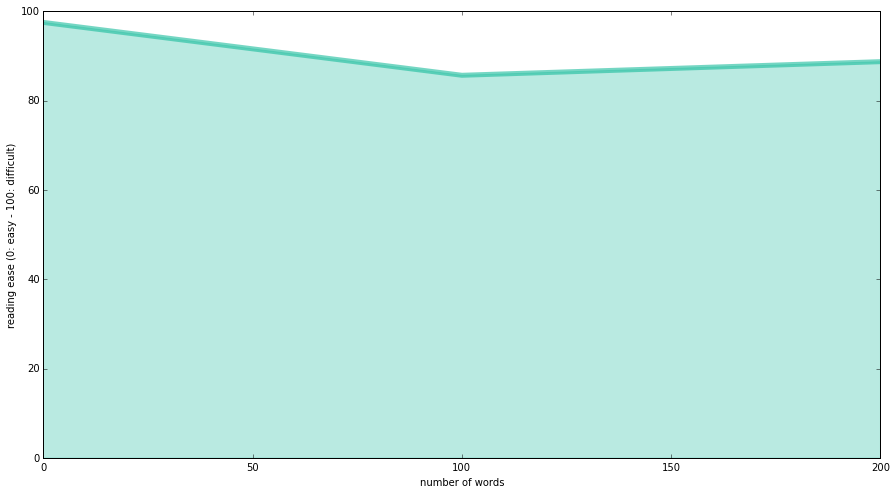

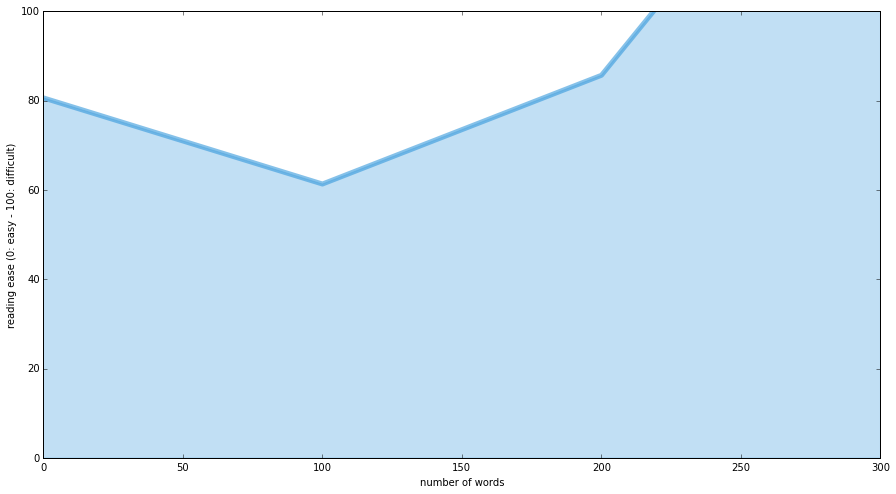

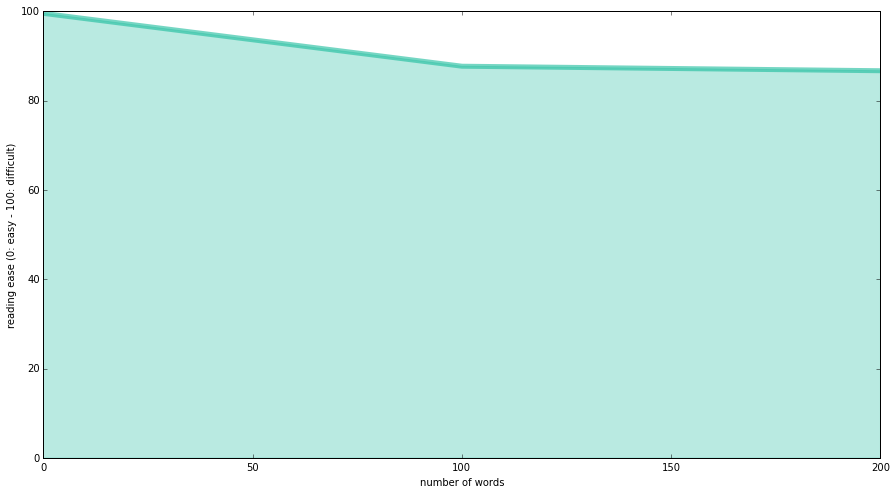

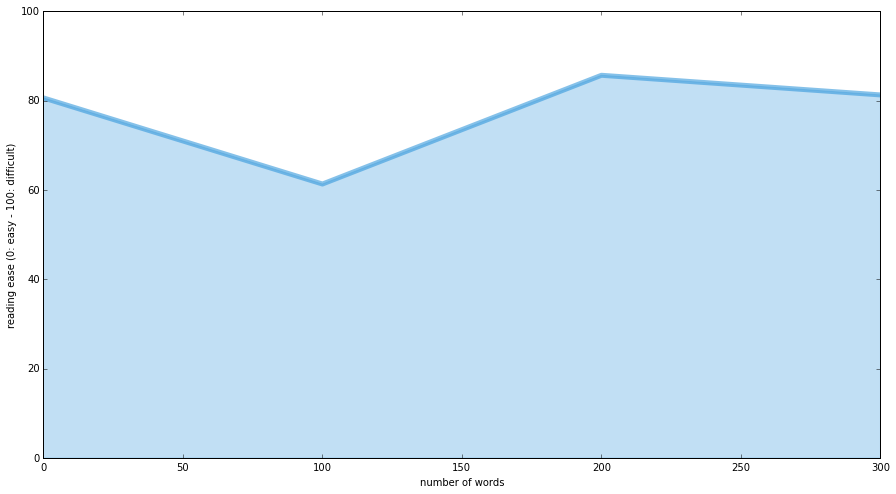

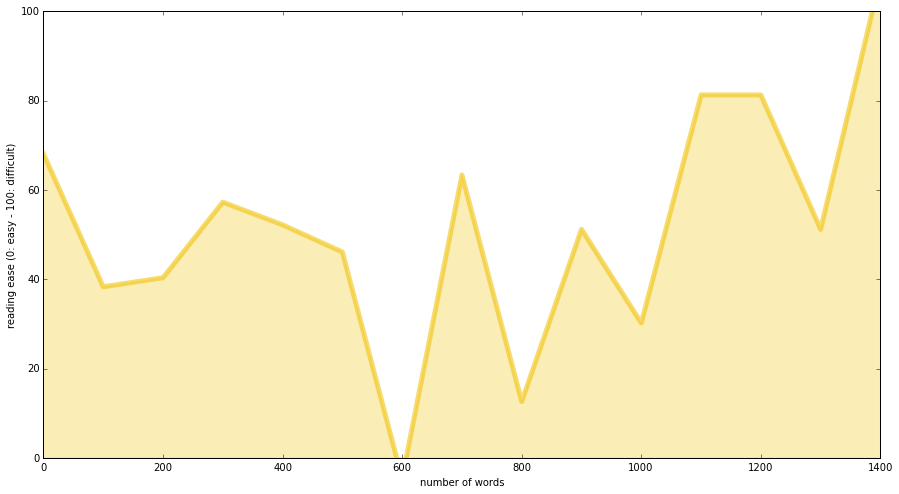

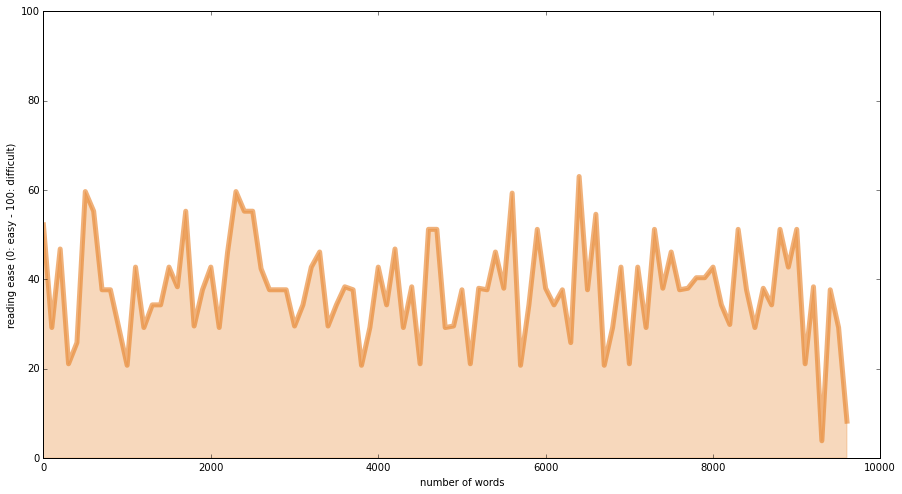

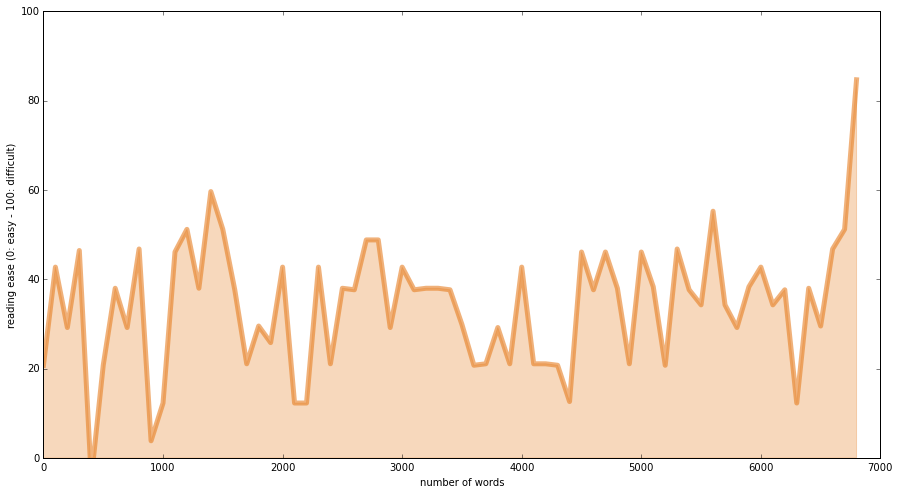

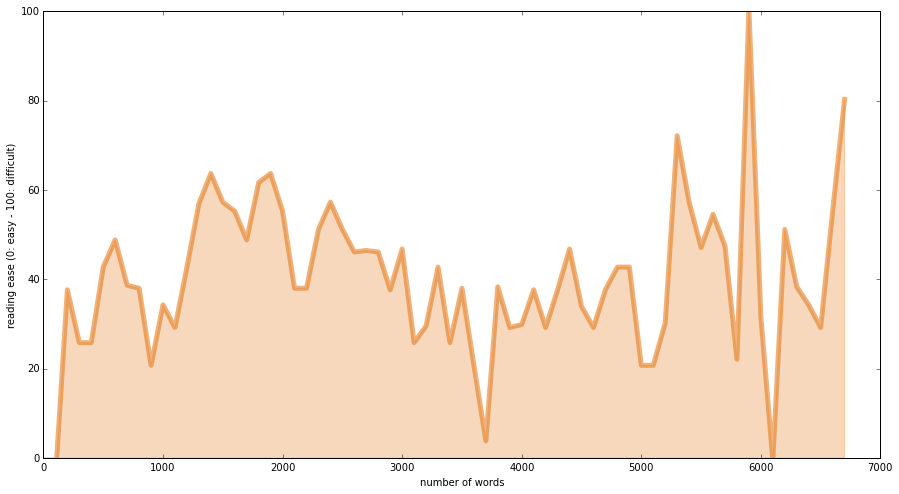

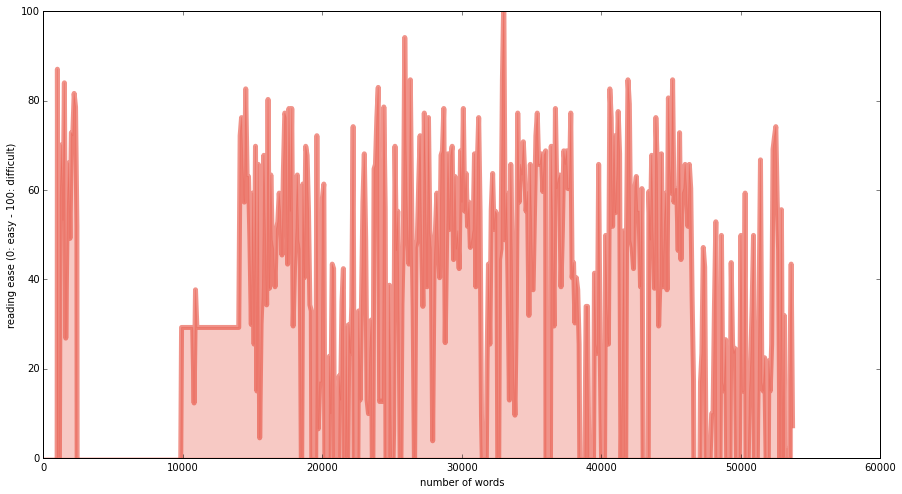

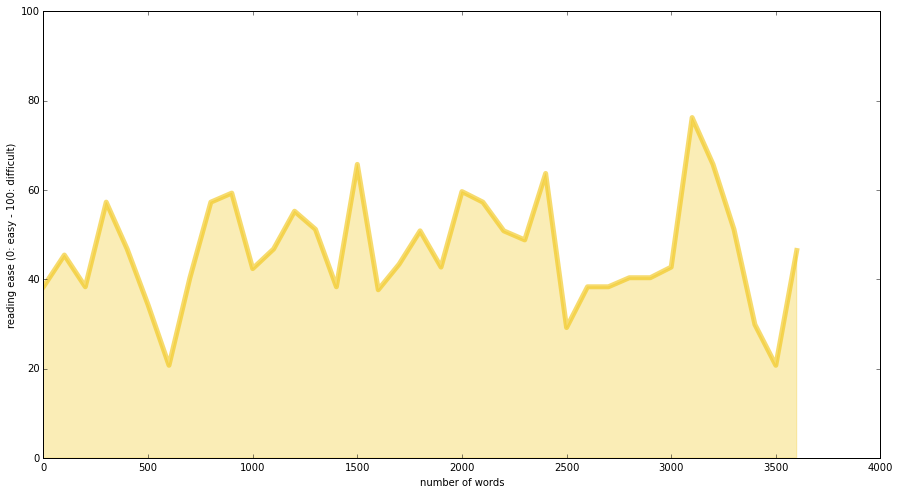

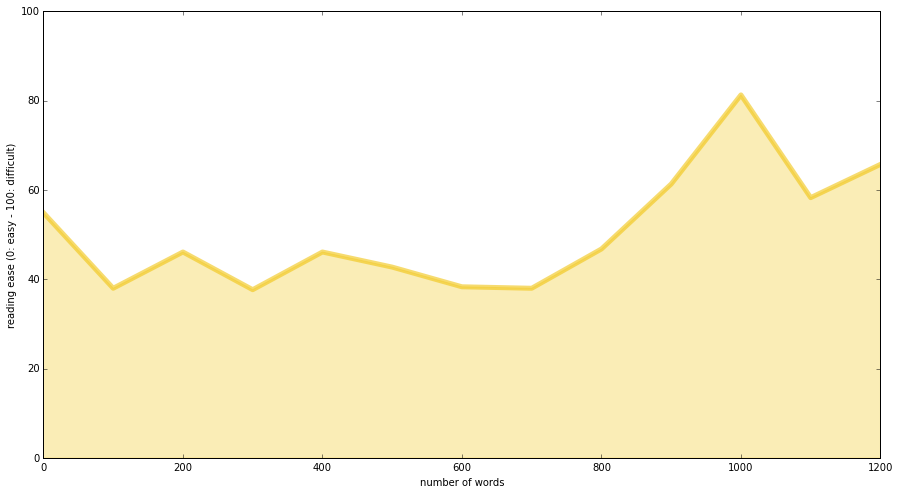

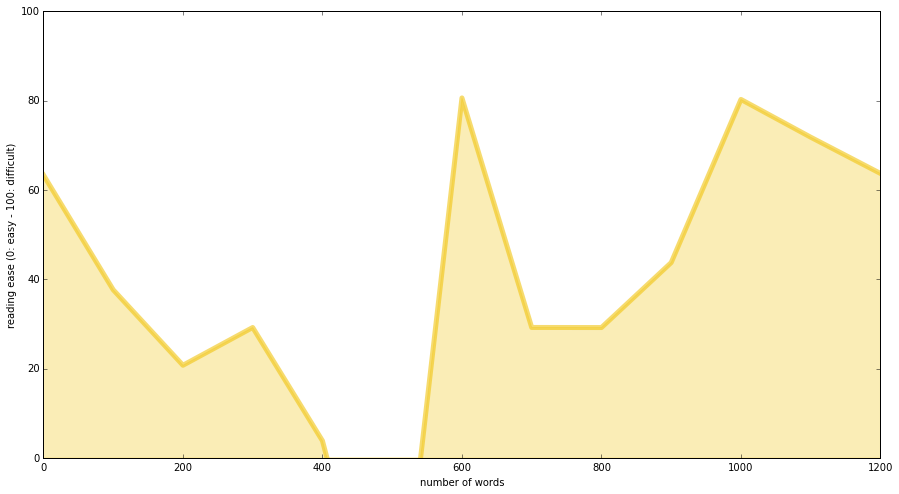

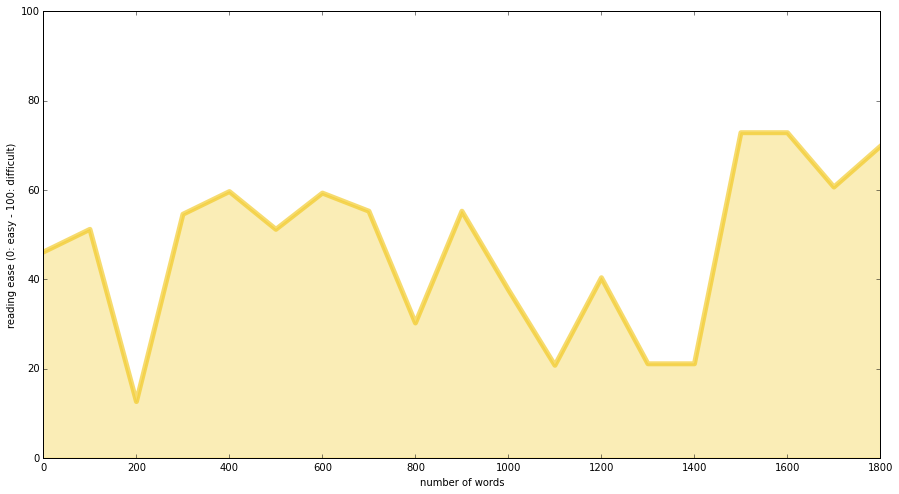

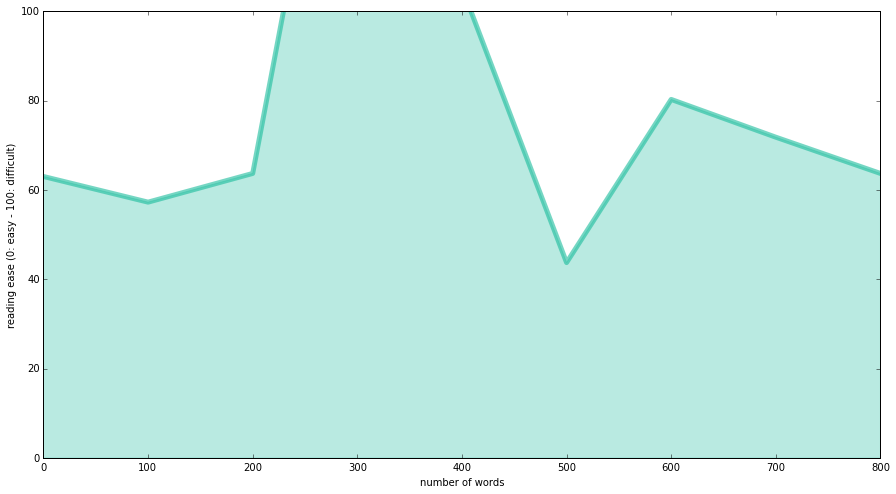

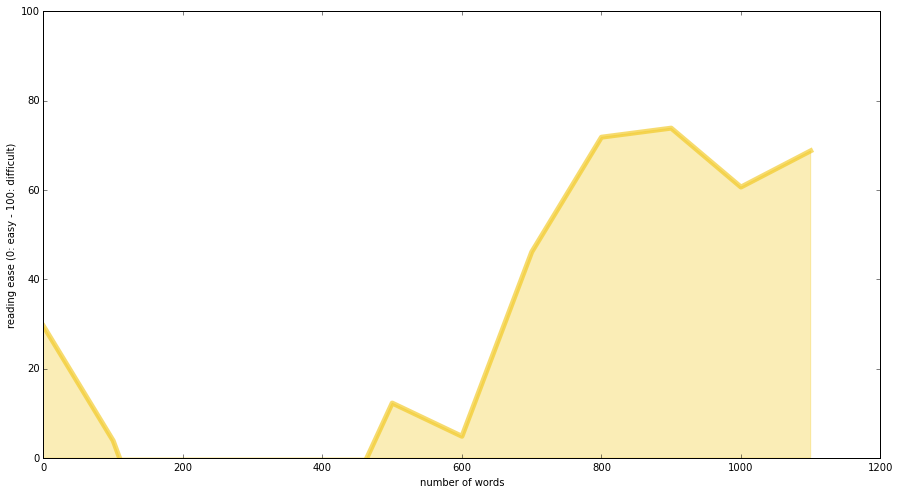

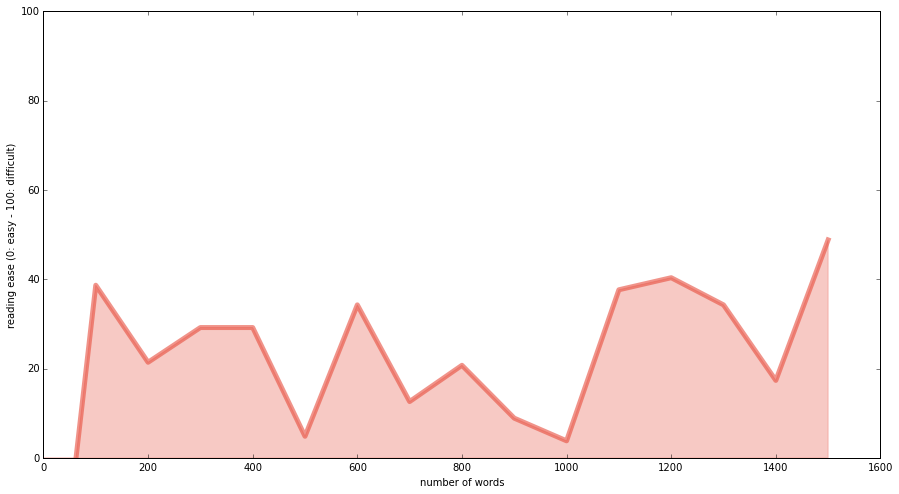

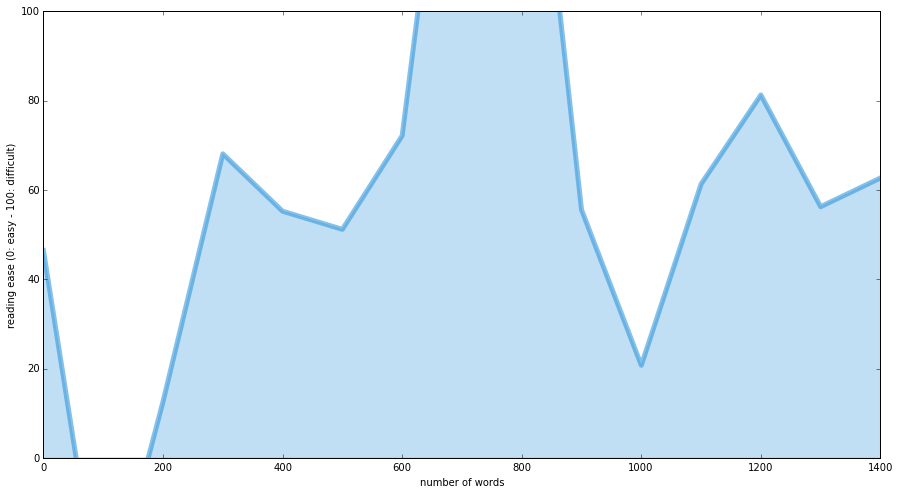

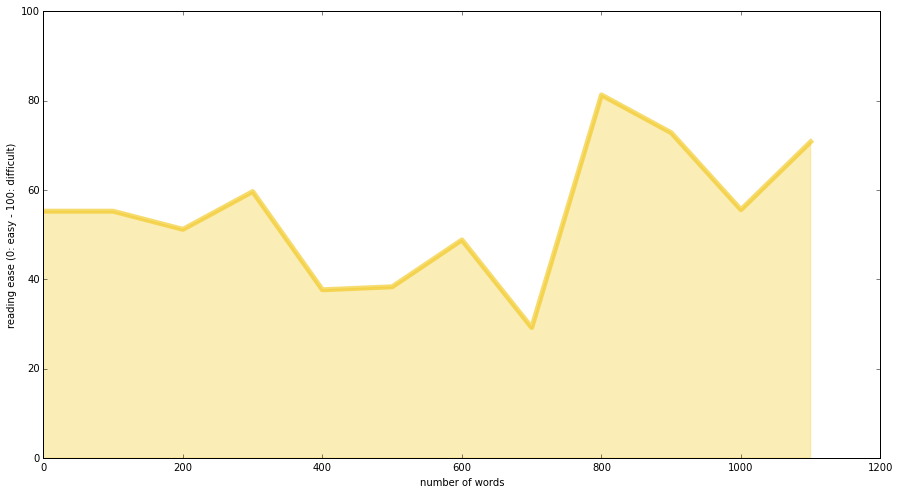

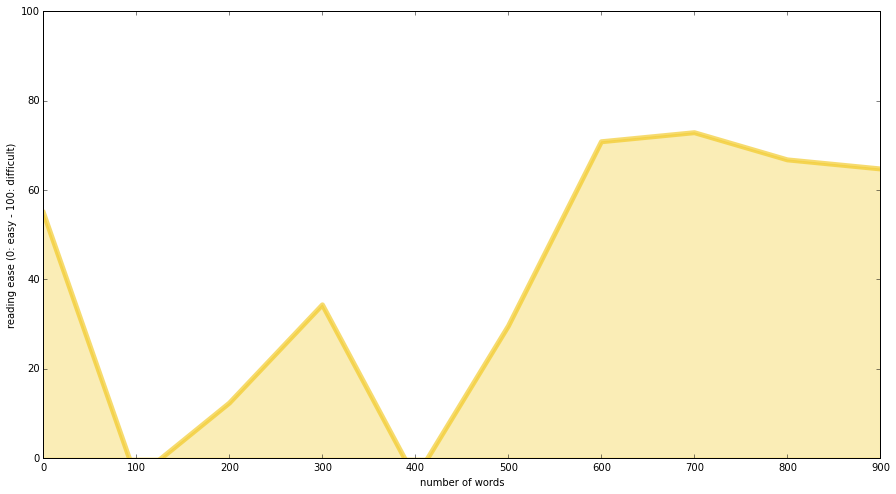

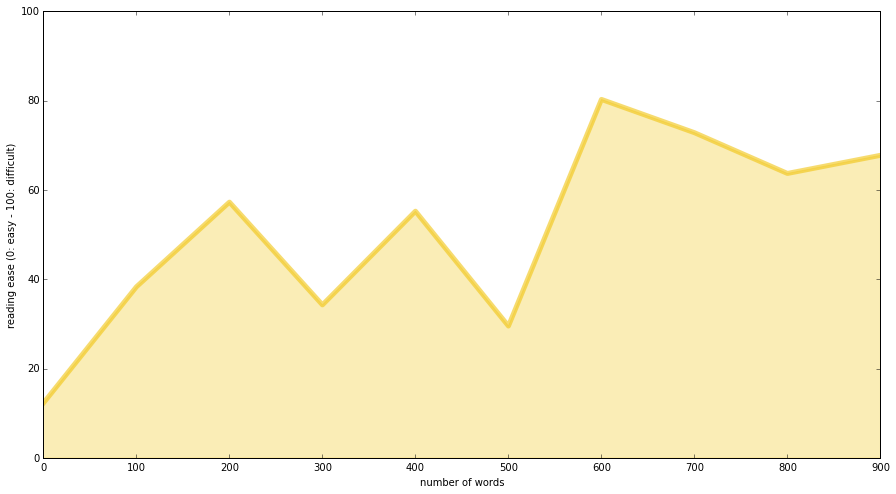

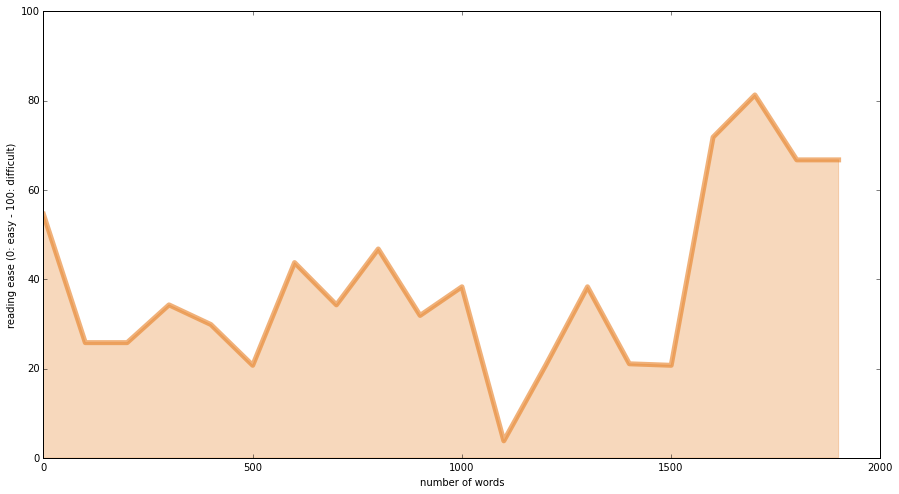

In [57]:
k = 0
for f in filelist:
    if k < 30:
        try:
            complexityAlongtheText(f)
            k +=1
        except:
            0

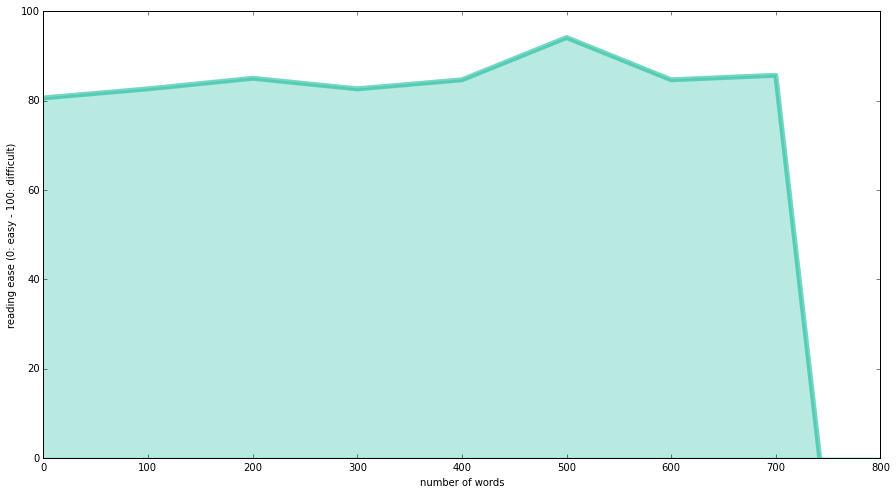

In [58]:
complexityAlongtheText("storyforchild.txt")

In [ ]:
complexityAlongtheText("storyforchild.txt")

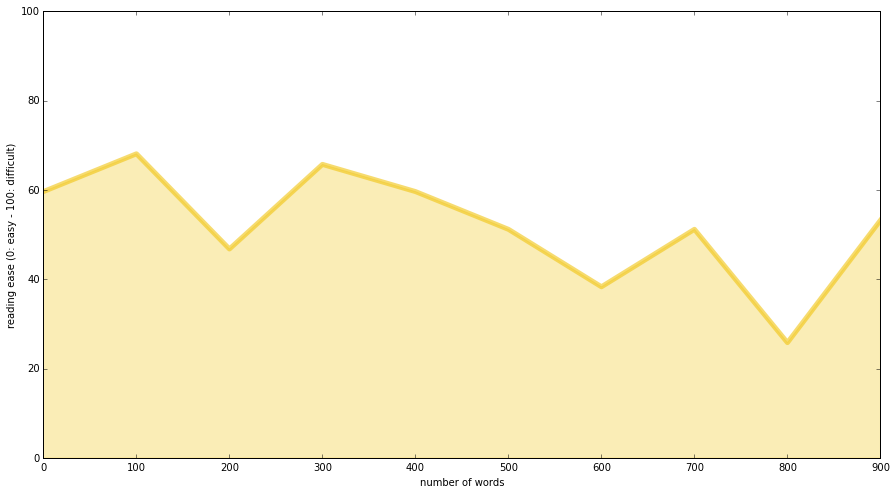

In [62]:
complexityAlongtheText("essay_2.txt")